# What Makes a Successful Horror Film?
**[Group-1]**

- Jingyi Fan (N15191508, jf4258)
- Tianyu Li (N18586573, tl3472)
- Wenxin Zhang (N15067695, wz2127)

# Introduction

Do you think horror movies are getting worse over time? Nowadays, horror is a genre that gets a lot of criticism for its subpar acting, reputitive and ludicrous plots, and over-the-top gore and violence. Any one of these can lessen a viewer’s opinion about horror films. They are not horrible, they are hilarious and ridiculous.

Therefore, in this project, we aim to discuss whether recent horror momvies become much worse than before? Can we find some key characteristics among the low-rating horror films? Are there other factors that contribute to the low-rating films, such as audiences, budget constraints, specific subgenres, rather than the storyline itself.


## Outline

The report is structured in the following manner:

**0. File Reading and Data Description**
- 0.1. Data Collection
- 0.2. File Reading
- 0.3. Data Description

**1. Film Release Year & Rating**
- 1.1. Film Release Trend by Year
- 1.2. Film Rating Trend by Year

**2. Genre & Rating**
- Color Dictionary
- 2.1. Proportion of Genre
- 2.2. Ratings by Genre

**3. Reviewer Portrait**
- 3.1. Age
    - 3.1.1. Reviewer Age Distribution
    - 3.1.2. Rating Tendency by Age
- 3.2. Gender
    - 3.2.1. Reviewer Gender Ratio
    - 3.2.2. Rating Tendency by Gender

**4. Which Country Produces High-Rated Horror Movies the Most?**

**5. Budget and Box Office**

- 5.1. Are the Most Profitable Films Also Highest-Rated?
- 5.2. Which Genre Is the Most Profitable?


## 0. File Reading and Data Description


### 0.1. Data Collection
We scraped data from IMDb, mainly focusing on the 730 top rated horror movies with more than 25000 ratings (updated on Dec 19th), available at https://www.imdb.com/search/title/?genres=horror&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=5aab685f-35eb-40f3-95f7-c53f09d542c3&pf_rd_r=2JQFC48GYRC816ZNGW0F&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_12. 

We scraped their release years, ratings, genres, countries of origin, budgets, box office and also the reviewers’ portraits from IMDb, parse the data and form visualized figures.

7 spiders and 7 .csv files are generated accordingly:
1. HorrormovieMainpageSpider.py ----- mainpage.csv
2. RankNum.py ----- ranking.csv
3. AllRate.py ----- allrate.csv
4. age_group.py ----- agegroup.csv
5. malespider.py ----- malespider.csv
6. femalespider.py ----- femalespider.csv
7. budget.py ----- budget.csv

### 0.2. File Reading

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpl
%matplotlib inline

In [171]:
# READ FILES
mainpage = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/mainpage.csv")
ranking = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/ranking.csv")
all_rate = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/allrate.csv")
age_group = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/age_group.csv")
male = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/malespider.csv")
female = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/femalespider.csv")
budget_read = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/budget.csv")

### 0.3. Data Description


#### 0.3.1. mainpage.csv

This csv file is generated from **HorrormovieMainpageSpider.py**, which scrapes the basic information of the 730 movies. The spider jumps to each movie’s main page from the horror movie’s ranking page of IMDb: https://www.imdb.com/search/title/?genres=horror&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=5aab685f-35eb-40f3-95f7-c53f09d542c3&pf_rd_r=MGA2DABQ5PR277WM004C&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_12.

A sample main page of movie can be found here (*Psycho*, 1960): https://www.imdb.com/title/tt0054215/?ref_=adv_li_tt.

- **Name**: title of the film;
- **Year**: release year of the film;
- **Rate**: the weighted average rating given by all of the users, same as the one shown on the main ranking page and the main film information page;
- **Genre**: genres of the film, including animation, action, adventure, fantasy, crime, drama, mystery, thriller, etc.;
- **Country**: issuing country of the film.


In [172]:
mainpage.head(5)

,Name,Year,Rate,Genre,Country
0,Deep Red,1975,7.6,"Horror,Mystery,Thriller",Italy
1,The Wailing,2016,7.5,"Horror,Mystery,Thriller",South Korea
2,Psycho,1960,8.5,"Horror,Mystery,Thriller",United States
3,A Quiet Place,2018,7.5,"Drama,Horror,Sci-Fi",United States
4,The Lighthouse,2019,7.5,"Drama,Fantasy,Horror,Mystery",Canada


#### 0.3.2. ranking.csv

This csv file is generated from **RankNum.py**. This spider scrapes the ranking value of films from the main ranking page. The ranking value before the film title on the ranking page is stored together in a list, so we wrote a for loop to match the ranking value with its film title, and store it in a dictionary.

- **Rank**: ranking value of the film on the ranking page;
- **Name**: title of the film;
- **Year**: release year of the film.


In [173]:
ranking.head(5)

,Rank,Name,Year
0,1,Psycho,1960
1,2,The Shining,1980
2,3,Alien,1979
3,4,Tumbbad,2018
4,5,Demon Slayer: Mugen Train,2020


#### 0.3.3. allrate.csv

This csv file is generated from **AllRate.py**, which generates the number of people to vote each rating value. We start from the ranking page, then use the jump_rating function to go to the user ratings page of each horror film. At this page, we scraped the number of voters of each rating value from 1 to 10.

A sample rating page of movie can be found here (*Psycho*, 1960): https://www.imdb.com/title/tt0054215/ratings/?ref_=tt_ov_rt.

- **Name**: title of the film;
- **Year**: release year of the film;
- **Rating**: the weighted average rating given by all of the users, same as the one shown on the main ranking page and the main film information page;
- **User_Type**: type of users. User_Type is all “IMDb Users” in order to distinguish from other types of users generated by other spiders;
- **vote10 ~ vote1**: the number of voters of each rating value (e.g. 55,603 for Saw vote10 means that there are 55,603 IMDb users in total rated horror film Saw 10/10).


In [174]:
all_rate.head(5)

,Name,Year,Rating,User_Type,vote10,vote9,vote8,vote7,vote6,vote5,vote4,vote3,vote2,vote1
0,The Lighthouse,2019,7.5,IMDb Users,21413,29629,48256,37827,18885,9223,4841,3132,2268,3743
1,A Quiet Place,2018,7.5,IMDb Users,54103,75677,152430,118066,47978,18678,8604,5048,3367,5649
2,The Conjuring,2013,7.5,IMDb Users,61822,70986,145724,120266,48014,17467,7025,3644,2187,3614
3,American Psycho,2000,7.6,IMDb Users,62803,84728,168004,131072,51486,19245,8347,4427,2934,4419
4,Psycho,1960,8.5,IMDb Users,154176,178106,173392,81863,26755,10529,4706,2575,1848,4906


#### 0.3.4. agegroup.csv

This csv file is generated from **age_group.py**, which scraped the rating and number of voters from each age group. We used these data to demonstrate the age distribution and rating tendencies for different age groups.

A sample rating page of movie can be found here (*Psycho*, 1960): https://www.imdb.com/title/tt0054215/ratings/?ref_=tt_ov_rt.

- **Movie**: title of the film;
- **Year**: release year of the film;
- **Rate_All Ages**: rating value voted by users from all ages;
- **Rate_<18 / 18-29 / 30-44 / 45+**: rating value voted by users under 18 / 18-29 / 30-44 / above 45;
- **Number_All Ages**: the number of voters for each film;
- **Number_<18 / 18-29 / 30-44 / 45+**:  the number of voters of under 18 / 18-29 / 30-44 / above 45


In [175]:
age_group.head(5)

,Movie,Year,Rate_All Ages,Rate_<18,Rate_18-29,Rate_30-44,Rate_45+,Number_All Ages,Number_<18,Number_18-29,Number_30-44,Number_45+
0,A Quiet Place,2018,7.5,7.6,7.6,7.4,7.4,489831,498,89041,154844,40616
1,Godzilla,1954,7.6,7.9,7.8,7.5,7.3,32428,32,4824,12546,6129
2,The Fly,1986,7.6,8.0,7.7,7.6,7.5,171639,58,17814,79829,30968
3,Psycho,1960,8.5,8.8,8.6,8.5,8.5,639113,371,101170,244362,90742
4,Deep Red,1975,7.6,7.4,7.7,7.6,7.4,36189,20,3991,16252,7145


#### 0.3.5. malespider.csv & femalespider.csv

This csv file is generated from **malespider.py** & **femalespider.py**. These 2 spiders scraped the rating and number of voters by genders. And we used the scraped data to demonstrate the gender ratio and rating tendencies for different genders.

A sample rating page of male reviewers (*Psycho*, 1960): https://www.imdb.com/title/tt0054215/ratings?demo=males;

A sample rating page of female reviewers (*Psycho*, 1960): https://www.imdb.com/title/tt0054215/ratings?demo=females.

- **Name**: title of the film;
- **Year**: release year of the film;
- **User_Type**: we have three types of users for this column. For ‘Malespider’, the user type should be ‘males’, and for ‘femalespider’, it should be ‘females’;
- **Rating**: the weighted average rating given by male/female users;
- **vote10 ~ vote1**: the number of voters of each rating value (e.g. 55,603 for Saw vote10 means that there are 55,603 IMDb users in total rated horror film Saw 10/10);
- **Rate_Male/Female**: the weighted average rating given by male/female users;
- **Rate_<18 / 18-29 / 30-44 / 45+ m/f**: rating by male/female users (e.g. 7.9 for ‘Rate_<18m’ means that the weighted average rating for male users under 18 years old is 7.9/10);
- **Number_Male/Female**: the number of male/female voters for each film;
- **Number_<18 / 18-29 / 30-44 / 45+ m/f**: rating by male/female users (e.g. 154 for ‘Number_<18m’ means that there are 154 male users under 18 years old voted this film)



In [176]:
male.head(5)

,Name,Year,User_Type,Rating,vote10m,vote9m,vote8m,vote7m,vote6m,vote5m,...,Rate_Male,Rate_<18m,Rate_18-29m,Rate_30-44m,Rate_45+m,Number_Male,Number_<18m,Number_18-29m,Number_30-44m,Number_45+m
0,The Fly,1986,males,7.6,10089,15490,39687,32512,11422,3703,...,7.6,8.0,7.7,7.6,7.5,115990,46,14846,69205,26819
1,The Wailing,2016,males,7.5,3252,5868,11518,9438,4029,1759,...,7.5,7.5,7.8,7.4,7.0,37753,22,9020,20925,4842
2,Godzilla,1954,males,7.5,3639,2717,5979,5475,2422,971,...,7.5,7.9,7.8,7.5,7.3,22060,22,4287,11380,5385
3,The Lighthouse,2019,males,7.4,9869,15295,26698,21611,10956,5347,...,7.4,8.3,7.9,7.3,6.7,97151,190,29063,45686,12876
4,Psycho,1960,males,8.5,88505,103803,98779,46092,14826,5504,...,8.5,8.9,8.6,8.5,8.5,364846,263,74742,195130,73595


In [177]:
female.head(5)

,Name,Year,User_Type,Rating,vote10f,vote9f,vote8f,vote7f,vote6f,vote5f,...,Rate_Female,Rate_<18f,Rate_18-29f,Rate_30-44f,Rate_45+f,Number_Female,Number_<18f,Number_18-29f,Number_30-44f,Number_45+f
0,A Quiet Place,2018,females,7.6,9106,10672,17895,13855,5971,2456,...,7.6,7.5,7.7,7.5,7.6,62991,101,20310,27873,6866
1,The Wailing,2016,females,7.2,507,800,1675,1549,693,388,...,7.2,7.2,7.4,7.1,7.0,6005,6,1756,3000,662
2,Tucker and Dale vs Evil,2010,females,7.6,3158,2960,5198,4057,1616,645,...,7.6,6.9,7.5,7.6,7.8,18337,7,4150,10972,2181
3,Godzilla,1954,females,7.4,314,285,624,553,195,132,...,7.4,8.4,7.5,7.3,7.3,2219,6,442,1027,654
4,Psycho,1960,females,8.4,21933,24749,24497,11939,4167,1866,...,8.4,8.2,8.5,8.4,8.5,91367,82,23989,46082,15597


#### 0.3.6. budget.csv

This csv file is generated from **budget.py**, which functions similar to **HorrormovieMainpageSpider.py**. It scrapes the budget and gross worldwide box office data (in US dollar) located on the main information page.

A sample main page of movie can be found here (*Psycho*, 1960): https://www.imdb.com/title/tt0054215/?ref_=adv_li_tt.

- **Name**: title of the film;
- **Year**: release year of the film;
- **Rate**: the weighted average rating given by all of the users, same as the one shown on the main ranking page and the main film information page;
- **Genre**: genres of the film, including animation, action, adventure, fantasy, crime, drama, mystery, thriller, etc.;
- **Country**: issuing country of the film.
- **Budget**: the estimated budget of the film;
- **Gross Worldwide**: gross box office worldwide.

In [178]:
budget_read.head(5)

,Name,Year,Rate,Genre,Country,Budget,Gross Worldwide
0,Psycho,1960,8.5,"Horror,Mystery,Thriller",United States,806947,32041845
1,The Wailing,2016,7.5,"Horror,Mystery,Thriller",South Korea,6420000,49851770
2,A Quiet Place,2018,7.5,"Drama,Horror,Sci-Fi",United States,17000000,340952971
3,The Lighthouse,2019,7.5,"Drama,Fantasy,Horror,Mystery",Canada,11000000,18124206
4,Saw,2004,7.6,"Horror,Mystery,Thriller",United States,1200000,103911669


## 1. Film Release Year & Rating
People often think that most top-rated horror movies are the classic old ones. So, at the beginning of our project, we want to figure out whether old horror movies are indeed better than modern horror movies.

In [179]:
main_rank = pd.merge(ranking, mainpage, on = ["Name", "Year"])

### 1.1. Film Release Trend by Year
First, we used a bar chart to show the number of horror movies for each year, in order to get a brief understanding about the trend.

Text(0.5, 0, 'Year')

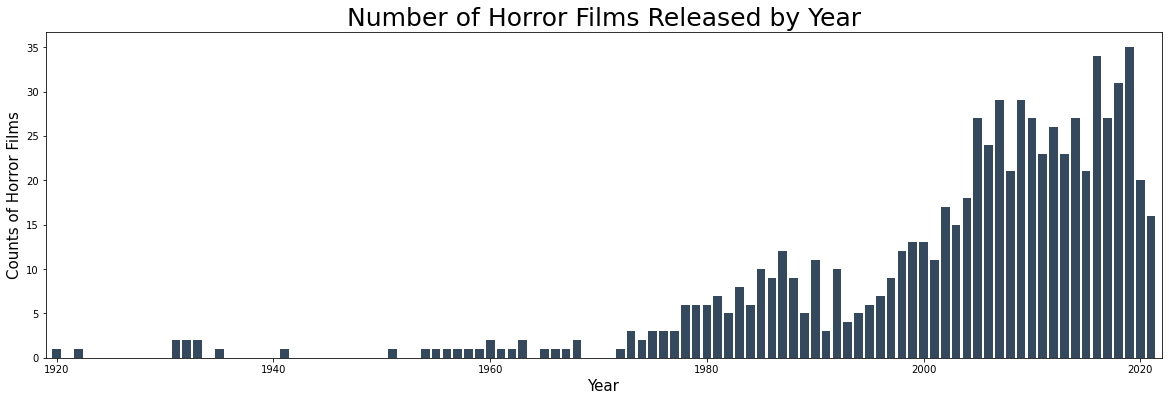

In [180]:
release_count = main_rank[["Year", "Rate"]].groupby(['Year']).count().reset_index().rename(columns={'Rate':'Count'})

fig, ax = plt.subplots(1, 1, figsize = (20,6))
ax.bar(
    x = release_count['Year'],
    height = release_count['Count'],
    color = '#34495E'
)
plt.xlim(1919, 2022)
plt.title("Number of Horror Films Released by Year", size = 25)
ax.set_ylabel("Counts of Horror Films", size = 15)
ax.set_xlabel("Year", size = 15)

>The first horror film was released in 1920. From then on, **generally more and more horror films are released each year, with a peak in 2019**. Unfortunately, the number decreases in 2020 and 2021 and violate the general trend, largely due to shocks of COVID-19 that freezes film industry. However, we should still remain optimistic about the release of horror film to recover back to its increasing trend in the future.

### 1.2. Film Rating Trend by Year
We analyzed the time trend of ratings of horror films by using a scatter plot.

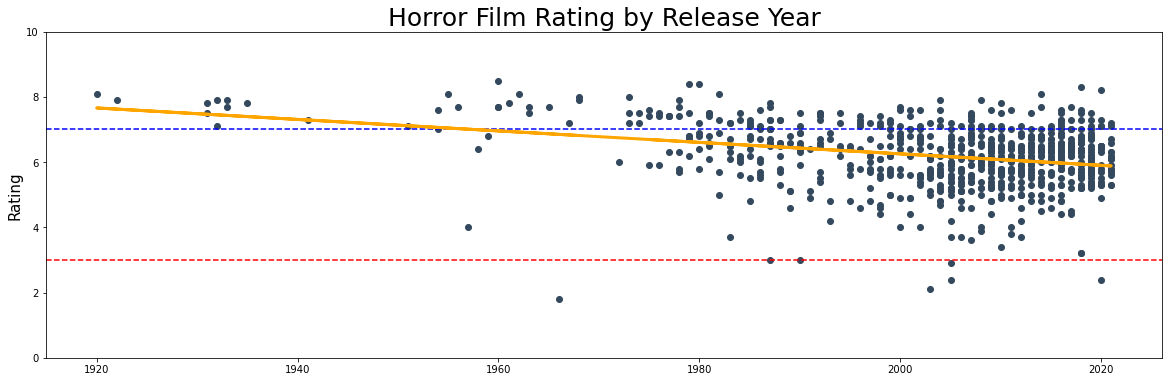

In [181]:
release_rate = main_rank[["Year", "Rate"]].groupby(['Year']).mean()

fig, ax = plt.subplots(1, 1, figsize = (20,6))
x = np.array(mainpage['Year'])
y = np.array(mainpage['Rate'])
m, b = np.polyfit(x, y, 1)
plt.ylim(0, 10)
ax.set_ylabel('Rating', size = 15)
plt.title('Horror Film Rating by Release Year', size = 25)
plt.plot(x, y, 'o', color = '#34495E')
plt.axhline(y=7, color='blue', linestyle='--')
plt.axhline(y=3, color='red', linestyle='--')
plt.plot(x, m*x + b, color = 'orange', lw=3)

>We find a generally **decreasing** trend of horror film ratings over time. Although more and more horror films are released in recent years, the average rating is not higher. However, we cannot deny the fact that there is no recent high-rated horror films. There are always good horror films (rated over 7) released each year, but bad films (rated below 3) show up less frequently.

By looking at the time trend of released horror films alone, it is not safe for us to conclude that modern horror films are worse than old ones. Despite of the general decreasing trend, variance of film rating scores in recent years is higher due to a larger number of films released.

Perception and rating tendencies of modern film audience should also be taken into consideration when analyzing film rating. Therefore, we turned to explore the difference in rating tendencies among different genders and age groups.

## 2. Genre & Rating

In this section, we plan to analyze the relationship between film genres and ranking. 
- First, we want to find the most popular subgenres by calculating their frequencies and proportions. We can see what genre of horror films filmmakers like to produce the most.
- Second, we analyze the average rating of each subgenre. By doing this, we can find out which subgenre of horror films is most likely to produce a high-rated film.

In [182]:
#convert string to list
def stringToList(string):
    listRes = list(string.split(","))
    return listRes

mainpage["Genre_list"] =mainpage.apply(lambda x : stringToList(x["Genre"]),axis=1)

In [183]:
#count the frequency and proportion of each subgenre
a = pd.Series(np.concatenate(mainpage.Genre_list))
Genre_count = pd.DataFrame({"Frequency":a.value_counts()}).rename(index={"Horror":"Total Number"})
Genre_count["Propotion"] =Genre_count["Frequency"]/Genre_count["Frequency"][0]*100  #calculate percentage for each genre
Genre_count= Genre_count.drop(index='Total Number')
Genre_count["Propotion"] = Genre_count["Propotion"].apply(lambda x: float("{:.2f}".format(x)))
Genre_count.head(5)

,Frequency,Propotion
Thriller,439,60.14
Mystery,270,36.99
Drama,187,25.62
Sci-Fi,178,24.38
Fantasy,136,18.63


### Color Dictionary

In order to distinguish the subgenres, we created a color Dictionary to specify each subgenre for the following discussion.

In [184]:
number = Genre_count.index.value_counts().sum()
print(f"On IMDb we can find {number} sub-genres for horror films.")

On IMDb we can find 18 sub-genres for horror films.


In [185]:
colors_list = {
       'Horror' : '#34495E',
       'Thriller' : '#1A5276',
       'Mystery' : '#EC7063',
       'Drama' : '#DC7633',
       'Sci-Fi' : '#EB984E',
       'Fantasy' : '#F5B041',
       'Action' : '#F4D03F',
       'Comedy' : '#58D68D',
       'Adventure' : '#52BE80',
       'Crime' : '#45B39D',
       'Romance' : '#48C9B0',
       'Family' : '#5DADE2',
       'Animation' : '#5499C7',
       'Western' : '#A569BD',
       'War' : '#AF7AC5',
       'Musical' : '#9FE2BF',
       'History' : '#DE3163',
       'Music' : '#7D3C98',
       'Biography' : '#CD6155'
       }

**Plot the Dictionary**

Here we show the color of each subgenre.

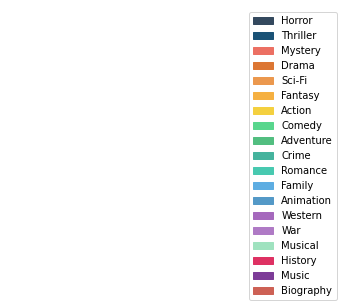

In [186]:
handles = [mpl.Patch(color=colors_list[x], label=x) for x in colors_list.keys()]
# Create legend
plt.legend(handles=handles)
# Get current axes object and turn off axis
plt.gca().set_axis_off()
plt.show()

### 2.1. Proportion of Genre
We used the frequency and proportion of each subgenre to create a bar chart and show their popularity among the horror movie field.

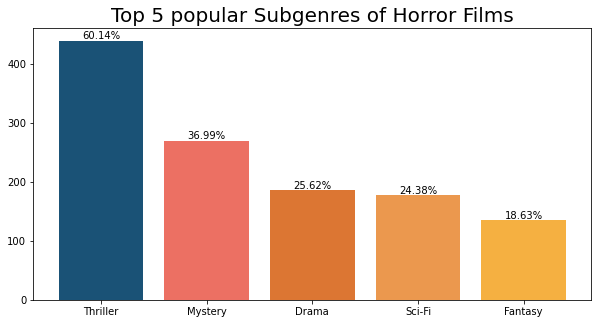

In [187]:
Genre_count['Genre'] =Genre_count.index
Genre_count_top5 = Genre_count.head(5)
plt.figure(figsize=(10,5))
c = Genre_count['Genre'].apply(lambda x: colors_list[x])
graph = plt.bar(Genre_count_top5.Genre,Genre_count_top5.Frequency, color = c)
plt.title('Top 5 popular Subgenres of Horror Films',size =20)
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Genre_count.Propotion[i])+'%',
             ha='center')
    i+=1
plt.show()

On the horizontal axis, we have the top 5 popular subgenres, and on the vertical axis, we have the frequency for each subgenre. The percentage above each bar represents the proportion of subgenre.

>As we can see in this chart, **Thriller** is the most popular subgenre among horror films, over 60% horror films contain the thriller element. **Mystery**, **Drama**, **Sci-fi** and **Fantasy** are also popular elements in horror films.

### 2.2. Ratings by Genre
For this section, we calculate the average ratings of each subgenre. What we are interested is to find the top-rating subgenres by IMDb users.

In [188]:
# Function to Calculate Average Rating by Genre
def genre_avgRating (genre):
    total_rating=0
    count=0
    for list in mainpage["Genre_list"]:
        i = mainpage["Genre_list"].tolist().index(list)
        if genre in list:
            total_rating = total_rating + mainpage["Rate"][i]
            count += 1
    return float("{:.2f}".format(total_rating / count))

In [189]:
# Get average rating of each film genre
a = pd.Series(np.concatenate(mainpage.Genre_list)).value_counts().index.tolist()
b = pd.DataFrame({'Genre' : a})
b['avg_rating'] = ""
for genre in b['Genre']:
    i = b['Genre'].tolist().index(genre)
    b['avg_rating'][i] = genre_avgRating(genre)
Genre_Rating = b.sort_values(by='avg_rating', ascending=False).reset_index().drop(columns="index")
Genre_Rating = Genre_Rating[Genre_Rating.Genre.isin(['Horror']) == False].reset_index().drop(columns="index")
Genre_Rating_top5 = Genre_Rating.head(5)

**Average Rating of Subgenres**

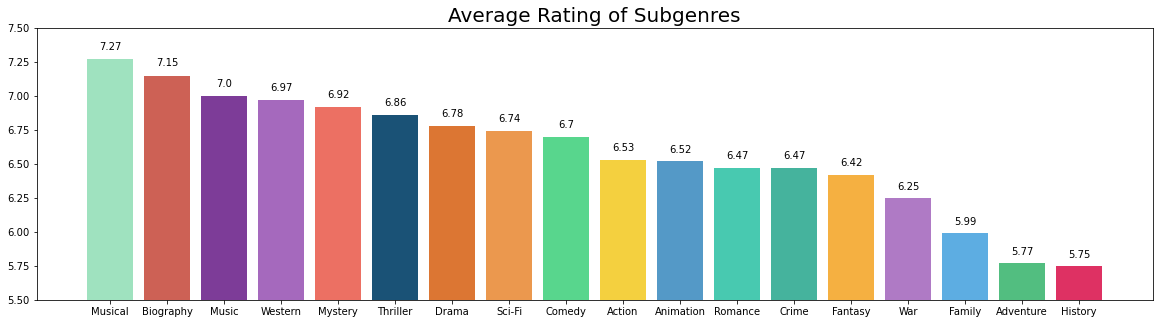

In [190]:
# Plot the average rating of each subgenre
plt.figure(figsize=(20,5))
z = Genre_Rating['Genre'].apply(lambda x: colors_list[x])
graph = plt.bar(Genre_Rating.Genre,Genre_Rating.avg_rating, color = z )
plt.ylim(5.5,7.5)
plt.title('Average Rating of Subgenres',size =20)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Genre_Rating.avg_rating[i]),
             ha='center')
    i+=1

The horizontal axis includes all 18 subgenres, and the vertical axis is the average rating. Specific average rating for each subgenre is shown above the bar.

>The result shows that **Musical**, **Biography** and **Music** are the top rating genres. **Family**, **Adventure** and **History** are the lowest rating genres. Therefore, people are more likely to watch horror films with **Musical**, **Biography** or **Music** elements, instead of the ones in **Family**, **Adventure** or **History** subgenres.

However, this conclusion may not hold if we take a closer look at the top rating genres.

**A Closer Look at the Top 5 Rating of Subgenres**

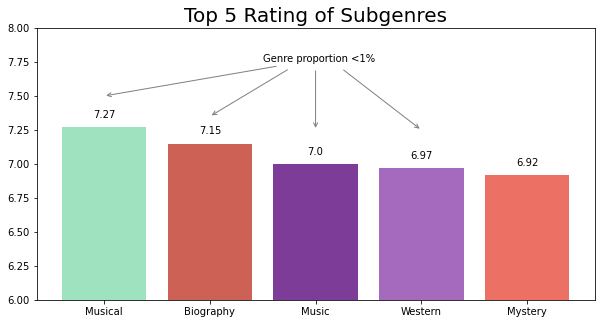

In [191]:
#Top 5 Rating Subgenres of Horror Films
plt.figure(figsize=(10,5))
c = Genre_Rating_top5['Genre'].apply(lambda x: colors_list[x])
graph = plt.bar(Genre_Rating_top5.Genre,Genre_Rating_top5.avg_rating, color = c )
plt.ylim(6,8)
plt.title('Top 5 Rating of Subgenres',size=20)
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Genre_Rating_top5.avg_rating[i]),
             ha='center')
    i+=1
plt.annotate('Genre proportion <1%',xy = (0,7.5),
            xytext=(1.5,7.75),
            arrowprops = {'arrowstyle' : "->",
                            'connectionstyle' : "arc3",
                            'color': 'grey'},)
plt.annotate('',xy = (1,7.35),
            xytext=(1.75,7.7),
            arrowprops = {'arrowstyle' : "->",
                            'connectionstyle' : "arc3",
                            'color': 'grey'},)
plt.annotate('',xy = (2,7.25),
            xytext=(2,7.7),
            arrowprops = {'arrowstyle' : "->",
                            'connectionstyle' : "arc3",
                            'color': 'grey'},)
plt.annotate('',xy = (3,7.25),
            xytext=(2.25,7.7),
            arrowprops = {'arrowstyle' : "->",
                            'connectionstyle' : "arc3",
                            'color': 'grey'},)

plt.show()

>As we can see, if we look at the top rating subgenres separately, the proportion for the top 4 are smaller than 1% ( based on the dataframe in 2.1), which means we don't have enough sample to confirm our conclusion, and prove **Musical**, **Biography**, **Music** and **Western** are most likely to have high rating horror films comparing with other subgenres.

>In terms of our results, horror films with these elements may produce outright masterpieces, but we have to admit this conclusion is contrary to our own experience.

**Rating of Top 5 Popular Subgenres**

In [192]:
Genre_Rating_count = Genre_Rating[Genre_Rating.Genre.isin(['Horror']) == False]
Genre_Rating_count = Genre_Rating_count[Genre_Rating_count.Genre.isin(['Thriller','Mystery','Drama','Sci-Fi','Fantasy']) == True].reset_index().drop(columns='index')

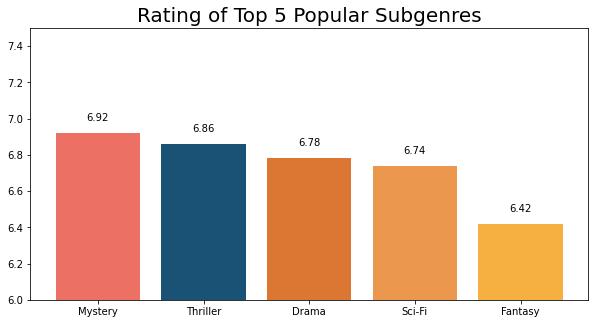

In [193]:
#Rating of Top 5 Popular Subgenres
plt.figure(figsize=(10,5))
c = Genre_Rating_count['Genre'].apply(lambda x: colors_list[x])
graph = plt.bar(Genre_Rating_count.Genre,Genre_Rating_count.avg_rating, color = c )
plt.ylim(6,7.5)
plt.title('Rating of Top 5 Popular Subgenres',size=20)
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Genre_Rating_count.avg_rating[i]),
             ha='center')
    i+=1

plt.show()

>The result demonstrates that the top 5 popular subgenres have a similar average rating, expect **Fantasy**.

>Probably due to the heavy reliance on cgi or the lack of compelling storyline, it is difficult for **Fantasy** horror films to have a higher rating.

## 3. Reviewer Portrait
We would like to summarize the characteristics of horror movie viewers and make a reviewer portrait, including the reviewers’ ages and genders.

### 3.1. Age

To study horror movie reviewers of different age groups, we scraped the number of rating and rating scores of each age group on IMDb user rating page. Due to reasons like film rating system, the scoring data of some movies by age group is missing, so only the data of 723 movies are analyzed.

#### 3.1.1. Reviewer Age Distribution
By using pie chart, we first demonstrated the age distribution of horror movie reviewers.

In [194]:
age_group_number_sum = pd.DataFrame({"Number": age_group[['Number_<18','Number_18-29','Number_30-44','Number_45+']].sum(axis=0)})
age_group_number_sum = age_group_number_sum.rename(index={'Number_<18': "Age<18", 'Number_18-29': "18-29", 'Number_30-44': "30-44",'Number_45+':"Age>44"})
age_group_number_sum

,Number
Age<18,33096
18-29,9924324
30-44,31255041
Age>44,9039414


Text(0.5, 1.0, 'Age Distribution of Reviewers')

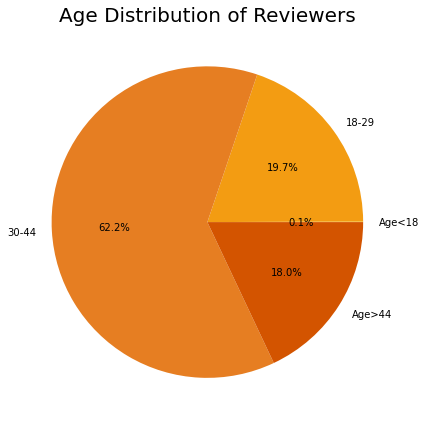

In [195]:
fig, ax = plt.subplots(1,1,figsize = (10,6), tight_layout = True)
ax.pie(
    x = age_group_number_sum['Number'],
    labels = age_group_number_sum.index,
    autopct='%1.1f%%',
    colors = ['#F1C40F', '#F39C12', '#E67E22', '#D35400'])
plt.title('Age Distribution of Reviewers', size = 20)

>We find that **more than half (62.2%) of the reviewers are from 30 to 44 years old**, with only 0.1% reviewers under 18 years old, 19.7% reviewers from 18-29 years old and 18.0% reviewers above 44 years old.

#### 3.1.2. Rating Tendency by Age
Then we used sub-bar plots to cross-analyze whether different age groups have different film-rating tendencies.

##### 3.1.2.1. Sub-bar Plot
We scraped the weighted average scores of each movie based on different age group, counted the frequency of the scores and plotted frequency histograms.

Text(0.5, 0, 'Ratings')

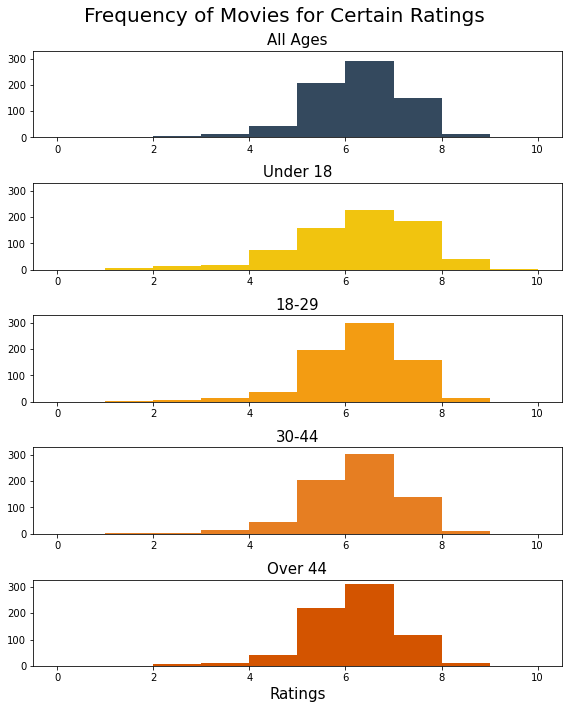

In [196]:
fig, axs = plt.subplots(5, 1, sharey=True, tight_layout=True,figsize=(8, 10))
# '#F1C40F', '#F39C12', '#E67E22', '#D35400'
axs[0].hist(age_group['Rate_All Ages'],range = [0, 10],bins = 10,density = False, color = '#34495E')
axs[0].set_title('All Ages', size = 15)
axs[1].hist(age_group['Rate_<18'],range = [0, 10],bins = 10,density = False, color = '#F1C40F')
axs[1].set_title('Under 18', size = 15)
axs[2].hist(age_group['Rate_18-29'],range = [0, 10],bins = 10,density = False, color = '#F39C12')
axs[2].set_title('18-29', size = 15)
axs[3].hist(age_group['Rate_30-44'],range = [0, 10],bins = 10,density = False, color = '#E67E22')
axs[3].set_title('30-44', size = 15)
axs[4].hist(age_group['Rate_45+'],range = [0, 10],bins = 10,density = False, color = '#D35400')
axs[4].set_title('Over 44', size = 15)
fig.suptitle('Frequency of Movies for Certain Ratings', size = 20)
plt.xlabel("Ratings", size = 15)

>We can find from the histogram that, for all age groups, **most movies have an weighted average score between 6 and 7**. But the rating distribution for reviewers under 18 is relatively more dispersed, while the one for reviewers over 44 is more concentrated.

##### 3.1.2.2. Bar Chart
We also calculated the average rating scores of all movies based on different age groups and created a bar plot.

In [197]:
age_group_number_mean = pd.DataFrame({"Average Rating": age_group[['Rate_All Ages','Rate_<18','Rate_18-29','Rate_30-44','Rate_45+']].mean(axis=0)})
age_group_number_mean = age_group_number_mean.rename(index={'Rate_All Ages':'All Ages','Rate_<18': "Under 18", 'Rate_18-29': "18-29", 'Rate_30-44': "30-44",'Rate_45+':"Over 44"})
age_group_number_mean

,Average Rating
All Ages,6.205394
Under 18,6.205256
18-29,6.248548
30-44,6.167635
Over 44,6.142877


Text(0.5, 1.0, 'Average Ratings of Different Age Groups')

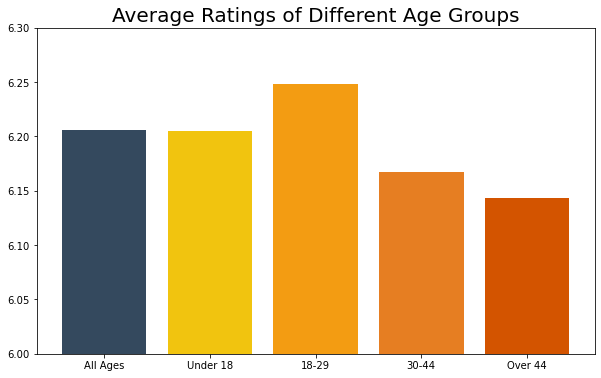

In [198]:
color = ['#34495E', '#F1C40F', '#F39C12', '#E67E22', '#D35400']
fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.bar(
    x = age_group_number_mean.index,
    height = age_group_number_mean['Average Rating'],
    color = color
    )
plt.ylim([6,6.3])
plt.title("Average Ratings of Different Age Groups", size = 20)

>We find that **reviewers from 18 to 29 years old are the most willing to give high scores to horror movies**. And the second and third most willing are reviewers under 18 and from 30 to 44 years old. Reviewers over 44 years old are more likely to give lower scores to horror moview than other age groups.

### 3.2. Gender

To study horror movie reviewers of different genders, we scraped the number of rating and rating scores of each genders on IMDb user rating page. Due to reasons that users may not choose their genders, the gender-based scoring of some movies is missing.

#### 3.2.1. Reviewer Gender Ratio
By using pie chart, we can demonstrate the age distribution of horror movie reviewers.

In [199]:
gender_ratio = pd.DataFrame({"Number": [female['Number_Female'].sum(axis=0),male['Number_Male'].sum(axis=0)]},
                            index=['Female','Male'])
gender_ratio

,Number
Female,8764216
Male,43032012


Text(0.5, 1.0, 'Gender Ratio of Reviewers')

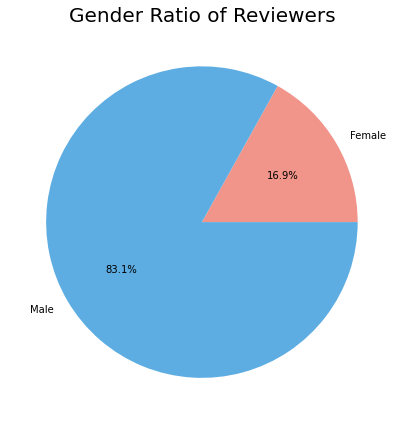

In [200]:
fig, ax = plt.subplots(1,1,figsize = (10,6), tight_layout = True)
color = ['#F1948A', '#5DADE2']
ax.pie(
    x = gender_ratio['Number'],
    labels = gender_ratio.index,
    autopct='%1.1f%%',
    colors = color)
plt.title('Gender Ratio of Reviewers', size = 20)

>We find that **83.1% of the horror movie reviewers are male and only 16.9% of the reviewers are female**. Probably, males are more fond of horror films than females.

#### 3.2.2. Rating Tendency by Gender
Then we used sub-bar plots to cross-analyze whether different genders have different film-rating tendencies.

##### 3.2.2.1. Sub-bar Plot 1
We scraped the weighted average scores of each movie based on different genders, counted the frequency of the scores and plotted frequency histograms.

Text(0.5, 0, 'Ratings')

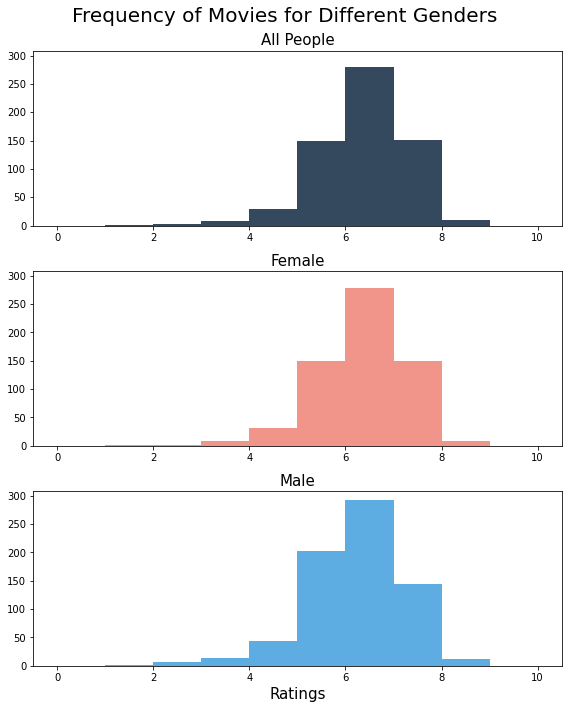

In [201]:
fig, axs = plt.subplots(3, 1, sharey=True, tight_layout=True,figsize=(8, 10))
axs[0].hist(female['Rating'],range = [0, 10],bins = 10,density = False, color = '#34495E')
axs[0].set_title('All People', size = 15)
axs[1].hist(female['Rate_Female'],range = [0, 10],bins = 10,density = False, color = '#F1948A')
axs[1].set_title('Female', size = 15)
axs[2].hist(male['Rate_Male'],range = [0, 10],bins = 10,density = False, color = '#5DADE2')
axs[2].set_title('Male', size = 15)
fig.suptitle('Frequency of Movies for Different Genders', size = 20)
plt.xlabel("Ratings", size = 15)

>In both genders, most movies have an weighted average score between 6 and 7. But **in male's group, more movies gained an average weighted score between 5 and 6, comparing to female's group**.

##### 3.2.2.2. Sub-bar Plot 2
We scraped the number of people (all people/female/male) voting for different scores, and calculated the proportion of the number of people (all people/female/male) voting a certain score to the total number of people (all people/female/male) voted. Using that proportion, we created the bar plots based on gender groups.

In [202]:
vote = pd.DataFrame(all_rate[['vote1','vote2','vote3','vote4','vote5','vote6','vote7','vote8','vote9','vote10']].sum(axis=0)).reset_index(drop=True)
vote = pd.concat([vote,
                 pd.DataFrame(female[['vote1f','vote2f','vote3f','vote4f','vote5f','vote6f','vote7f','vote8f','vote9f','vote10f']].sum(axis=0)).reset_index(drop=True)
                 ],axis=1)
vote = pd.concat([vote,
                 pd.DataFrame(male[['vote1m','vote2m','vote3m','vote4m','vote5m','vote6m','vote7m','vote8m','vote9m','vote10m']].sum(axis=0)).reset_index(drop=True)
                 ],axis=1)
vote.index = np.arange(1, len(vote) + 1)
vote = vote.T.reset_index(drop=True).T
vote['All People Proportion']=(vote[0]/sum(vote[0]))*100
vote['Female Proportion']=(vote[1]/sum(vote[1]))*100
vote['Male Proportion']=(vote[2]/sum(vote[2]))*100
vote.rename(columns = {
    0 : 'All People Num',
    1 : 'Female Num',
    2 : 'Male Num'
    })


,All People Num,Female Num,Male Num,All People Proportion,Female Proportion,Male Proportion
1,1969204,261195,1163609,2.833597,2.980244,2.704054
2,1343036,175725,822070,1.932569,2.005028,1.910368
3,2106162,259135,1317922,3.030674,2.956739,3.062655
4,3663505,446345,2317260,5.271621,5.092811,5.384968
5,7149592,866972,4551503,10.287946,9.892180,10.577016
6,12365797,1447550,7914354,17.793833,16.516594,18.391782
7,16073705,1892304,10165015,23.129348,21.591252,23.621984
8,12668376,1586323,7796295,18.229231,18.099999,18.117431
9,5954108,828134,3539765,8.567697,9.449037,8.225888
10,6201361,1000533,3444219,8.923483,11.416115,8.003853


Text(0.5, 0, 'Rating Scores')

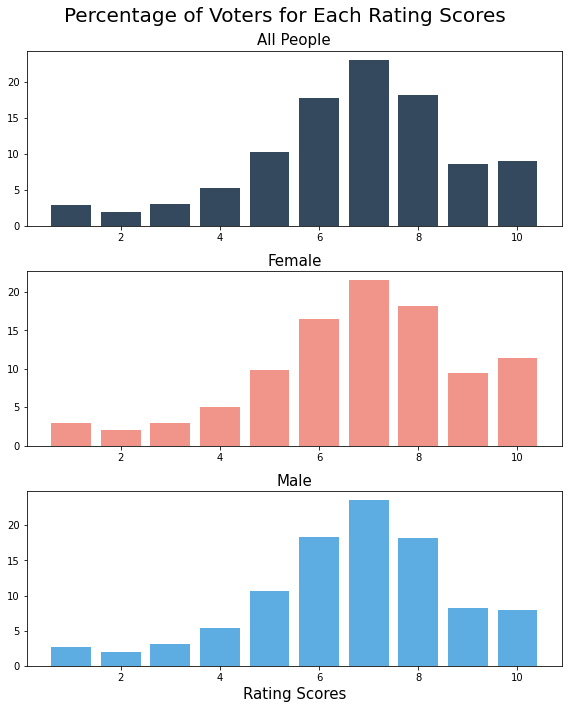

In [203]:
fig, axs = plt.subplots(3, 1, sharey=False, tight_layout=True,figsize=(8, 10))
axs[0].bar(vote.index,vote['All People Proportion'], color = '#34495E')
axs[0].set_title('All People', size = 15)
axs[1].bar(vote.index,vote['Female Proportion'], color = '#F1948A')
axs[1].set_title('Female', size = 15)
axs[2].bar(vote.index,vote['Male Proportion'], color = '#5DADE2')
axs[2].set_title('Male', size = 15)
fig.suptitle('Percentage of Voters for Each Rating Scores', size = 20)
plt.xlabel("Rating Scores", size = 15)

>The graph shows that **the proportion of females voting for a score above 8 is higher than the proportion of males**.

##### 3.2.2.3. Bar Chart
We also calculated the average rating scores of all movies based on different gender groups and created a bar plot.


In [204]:
gender_rate_mean = pd.DataFrame({"Average Rating": all_rate[['Rating']].mean()})
gender_rate_mean = pd.concat([gender_rate_mean,
                              pd.DataFrame({"Average Rating": female[['Rate_Female']].mean()})
                              ])
gender_rate_mean = pd.concat([gender_rate_mean,
                              pd.DataFrame({"Average Rating": male[['Rate_Male']].mean()})
                              ])                              
gender_rate_mean = gender_rate_mean.rename(index={'Rating':'All People','Rate_Female': "Female", 'Rate_Male': "Male"})
gender_rate_mean

,Average Rating
All People,6.198765
Female,6.314149
Male,6.179609


Text(0.5, 1.0, 'Average Ratings of Different Genders')

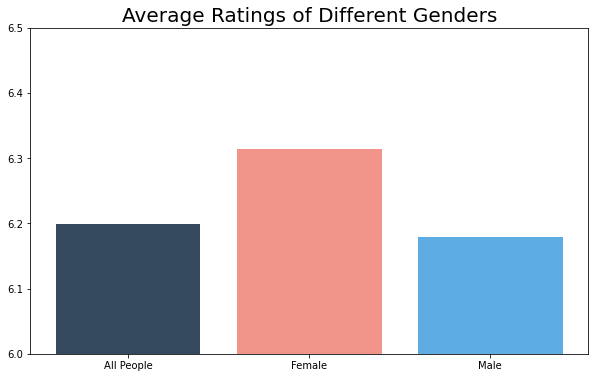

In [205]:
color = ['#34495E', '#F1948A', '#5DADE2']
fig, ax = plt.subplots(1, 1, figsize = (10,6))
ax.bar(
    x = gender_rate_mean.index,
    height = gender_rate_mean['Average Rating'],
    color = color
    )
plt.ylim([6,6.5])
plt.title("Average Ratings of Different Genders", size = 20)

>We find that **females have a higher average rating score of 6.31 than males**. But as there are only 16.9% reviewers are female, so the average ratings of all people are more similar to males than to females, with **the average of male reviewers being 6.18 and the average of all people being 6.20**.

#### Conclusion
>**By age**, we find that the main reviewers of horror movies are people from 30 to 44 years old. The proportion of reviewers of 'under 18', '18-29', '30-44', 'over 44' are 0.1%, 19.7%, 62.2%, and 18.0%, respectively. Reviewers under 18 has the lowest concentration of scoring, and reviewers from 18 to 29 are the most willing to give high scores to horror movies.

>**By gender**, we find that 83.1% of the horror movie reviewers are male and only 16.9% of the reviewers are female. And females are more likely to give higher scores to horror movies than males.

## 4. Which Country Produces High-Rated Horror Movies the Most?
Does the US produce more horror movies rated over 4 or below 3? Does Canada release more low-rated movies than the UK? To analyze which country produces most high-rated horror films, we produced bar plots for each country to count the number of films by rating value.

In [206]:
gb_country = mainpage[['Name', 'Country']].groupby('Country').count().sort_values(by='Name', ascending=False).reset_index().rename(columns={'Name' : 'Count'})

In [207]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is greater than 400: Adjust label location
        if y_value > 400:
            space = spacing - 3
            # Vertically align label at top
            va = 'bottom'

        # Use Y value as label and format number with one decimal place, if Y is positive (nonzero)
        label = int(y_value) if y_value > 0 else None

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

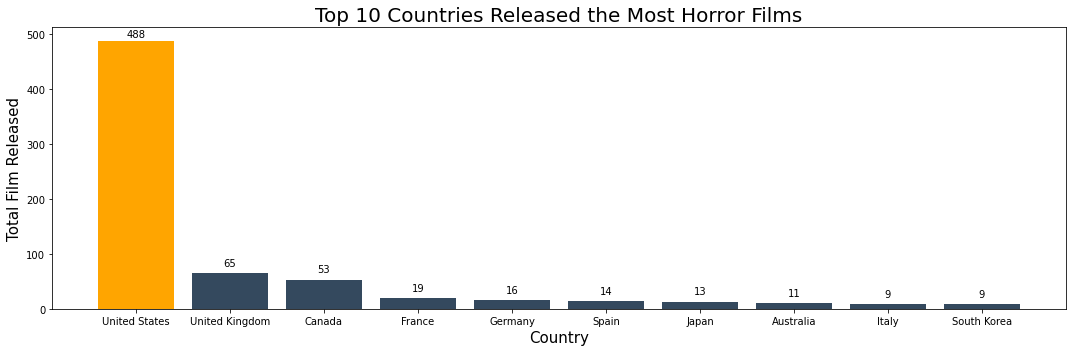

In [208]:
# plot
fig, ax =plt.subplots(1,1,tight_layout=True,figsize = (15,5))
clrs = ['orange' if (a == max(gb_country[:10]['Count'])) else '#34495E' for a in gb_country[:10]['Count']]
ax.bar(
    x = gb_country[:10]['Country'],
    height = gb_country[:10]['Count'],
    color = clrs)
ax.set_xlabel("Country", size = 15)
ax.set_ylabel('Total Film Released', size = 15)
plt.title('Top 10 Countries Released the Most Horror Films', size = 20)
add_value_labels(ax)

>We see that **the US takes a dominately leading role in horror film industry, far beyond other countries.** It might be due to the fact that IMDb is a US film rating website and may not include all films released in areas other then North America.

Because the difference of total horror films released is not significant among countries other than the top 3, we combined those countries together when calculating the proportion of horror films released.

In [209]:
# combine: top 3 and others
country_top_proportion = pd.DataFrame({
    'country' : [
        gb_country['Country'][0],
        gb_country['Country'][1],
        gb_country['Country'][2],
        'Other'],
    'frequency' : [
        gb_country['Count'][0],
        gb_country['Count'][1],
        gb_country['Count'][2],
        gb_country['Count'][3:].sum()]
})

Text(0.5, 1.0, 'Proportion of Released Horror Films by Country')

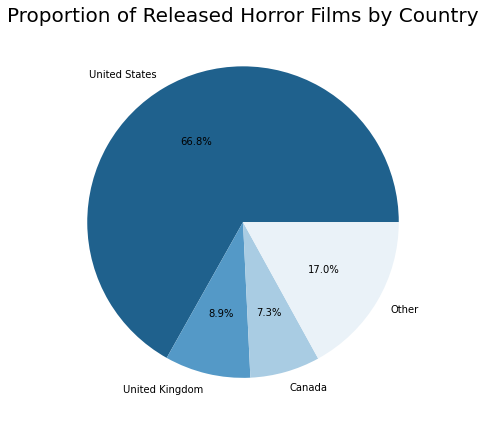

In [210]:
# plot pie chart
fig, ax = plt.subplots(1,1,figsize = (10,6), tight_layout = True)
clrs = [
    '#1F618D',
    '#5499C7',
    '#A9CCE3',
    '#EAF2F8']
ax.pie(
    x = country_top_proportion['frequency'],
    labels = country_top_proportion['country'],
    autopct='%1.1f%%',
    colors = clrs)
plt.title('Proportion of Released Horror Films by Country', size = 20)

Here, we further analyzed the distribution by rating scores among the top 3 countries that release the most horror films: **the United States, the United Kingdom,** and **Canada**.

In [211]:
def add_pct_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # # If value of bar is greater than 0.5: Adjust label location
        # if y_value > 0.5:
        #     space = spacing - 20
        #     # Vertically align label at top
        #     va = 'bottom'

        # Use Y value as label and format number with one decimal place, if Y is positive (nonzero)
        label = "{:.2%}".format(y_value) if y_value >0 else None #int(y_value) if y_value >0 else None

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

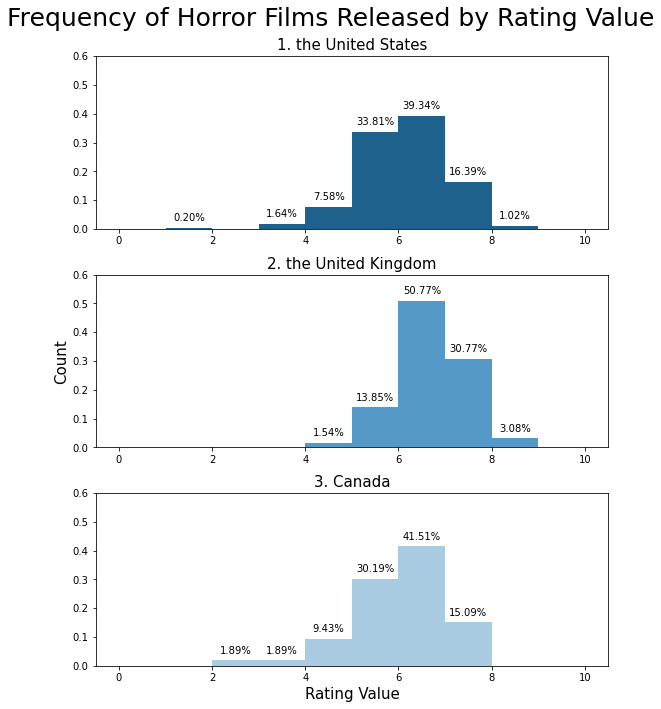

In [212]:
fig, ax = plt.subplots(3, 1, sharey=True, tight_layout=True,figsize=(8, 10))
fig.suptitle('Frequency of Horror Films Released by Rating Value', size = 25)
plt.xlabel("Rating Value", size = 15)

# 1. US
ax[0].hist(mainpage.query('Country == "United States"')['Rate'], range = [0, 10],bins = 10, density = True, color = '#1F618D')
ax[0].set_title("1. the United States", size = 15)
add_pct_labels(ax[0])
ax[0].set_ylim(0, 0.6)

# 2. UK
ax[1].hist(mainpage.query('Country == "United Kingdom"')['Rate'], range = [0, 10],bins = 10, density = True, color = '#5499C7')
ax[1].set_title("2. the United Kingdom", size = 15)
ax[1].set_ylabel("Count", size = 15)
add_pct_labels(ax[1])
# ax[1].set_ylim(0, 37)

# 3. Canada
ax[2].hist(mainpage.query('Country == "Canada"')['Rate'], range = [0, 10],bins = 10, density = True, color = '#A9CCE3')
ax[2].set_title("3. Canada", size = 15)
add_pct_labels(ax[2])
# ax[2].set_ylim(0, 25)

>In all three countries, **most horror films are rated between 6 and 7 in IMDb**. The UK has a relatively larger proportion of films rated above 7, and a smaller proportion rated below 5. If you want to avoid seeing a bad horror film, choose the one released from the UK gives you greater odds!

## 5. Budget and Box Office


### 5.1. Are the Most Profitable Films Also Highest-Rated?
We turn to look at another measure of a "successful" horror film: **revenue**. We define a film's revenue as the difference between its gross worldwide box office and budget. After removing missing data, a total of 542 horror films were included in our analysis.

In [213]:
budget = pd.merge(budget_read, ranking, on=['Name', 'Year'])
budget.shape

(542, 8)

In [214]:
# rank by revenue
budget['Revenue'] = budget['Gross Worldwide'] - budget['Budget']
budget = budget.rename(columns={"Rank" : "Rank by Rating"}).sort_values(by = 'Revenue', ascending = False).set_index("Name").reset_index()
budget["Rank by Revenue"] = budget.index + 1
budget[['Name', 'Year', 'Rank by Rating', 'Rank by Revenue', 'Rate', 'Revenue']].set_index("Rank by Revenue").head(10)

,Name,Year,Rank by Rating,Rate,Revenue
Rank by Revenue,,,,,
1,It,2017,83,7.3,666796444
2,Hotel Transylvania 3: Summer Vacation,2018,346,6.3,448583774
3,The Exorcist,1973,11,8.0,430306145
4,The Meg,2018,548,5.6,400438278
5,Hotel Transylvania 2,2015,210,6.7,395186706
6,It Chapter Two,2019,266,6.5,394093228
7,World War Z,2013,149,7.0,350455876
8,The Nun,2018,609,5.3,343551694
9,A Quiet Place,2018,47,7.5,323952971


In [215]:
# rank by rating
budget[['Name', 'Year', 'Rank by Rating', 'Rank by Revenue', 'Rate', 'Revenue']].sort_values(by = 'Rank by Rating', ascending = True).set_index("Rank by Rating").head(10)

,Name,Year,Rank by Revenue,Rate,Revenue
Rank by Rating,,,,,
1,Psycho,1960,248,8.5,31234898
2,The Shining,1980,263,8.4,27998772
3,Alien,1979,95,8.4,95285522
6,The Blue Elephant,2014,480,8.1,-2804564
7,The Thing,1982,387,8.1,4632053
10,The Cabinet of Dr. Caligari,1920,429,8.1,-9189
11,The Exorcist,1973,3,8.0,430306145
13,Let the Right One In,2008,372,7.9,7227336
15,Dawn of the Dead,1978,443,7.9,-490178


>Unsurprisingly, **not all profitable horror films are highest rated**, with an exception of the 1973 film ***The Exorcist*** rated at 8.0. ***It*** is also the earliest released and the only one released before 2010s. The lowest rated profitable film is ***The Nun***, released in 2018 and ranked at top 8 by revenue.

>On the other hand, 3 of the top 10 highest rated horror films even gain a negative revenue. The 2014 film ***The Blue Elephant*** and the 2008 film ***Let the Right One In*** are the only ones released in the 21st century whose rates ranked at top 10.

### 5.2. Which Horror Film Subgenre Is the Most Profitable?
We also analyzed average revenue with horror film subgenres to see what type of horror movies people prefer to pay to watch.

In [216]:
#convert string to list
def stringToList(string):
    listRes = list(string.split(","))
    return listRes

budget["Genre_list"] = budget.apply(lambda x : stringToList(x["Genre"]),axis=1)

In [217]:
# Function to Calculate Average Revenue by Genre
def genre_avgRev (genre):
    total_rev=0
    count=0
    for list in budget["Genre_list"]:
        i = budget["Genre_list"].tolist().index(list)
        if genre in list:
            total_rev = total_rev + budget["Revenue"][i]
            count += 1
    return float("{:.2f}".format(total_rev / count))

In [218]:
# get average revenue of each film genre
a = pd.Series(np.concatenate(budget.Genre_list)).value_counts().index.tolist()
b = pd.DataFrame({'Genre' : a})
b['avg_rev'] = ""
for genre in b['Genre']:
    i = b['Genre'].tolist().index(genre)
    b['avg_rev'][i] = genre_avgRev(genre)
avg_rev = b.sort_values(by='avg_rev', ascending=False).reset_index().drop(columns="index")

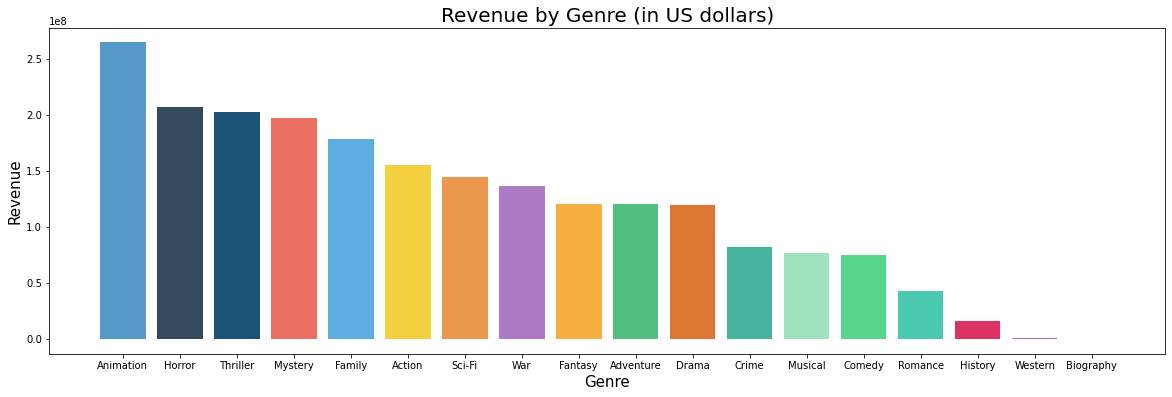

In [219]:
# plot
fig, ax = plt.subplots(1,1, figsize = (20,6))
ax.set_title("Revenue by Genre (in US dollars)", size = 20)
ax.set_xlabel('Genre', size = 15)
ax.set_ylabel('Revenue', size = 15)
dd = avg_rev['Genre'].apply(lambda x: colors_list[x])
ax.bar(avg_rev['Genre'], height = avg_rev['avg_rev'], color=dd)
plt.show()

In [220]:
def add_toprev_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # If value of bar is greater than 400: Adjust label location
        if y_value > 400:
            space = spacing - 3
            # Vertically align label at top
            va = 'bottom'

        # Use Y value as label and format number with one decimal place, if Y is positive (nonzero)
        label = "${:.2}b".format(y_value/1000000000) #if y_value >0 else None

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

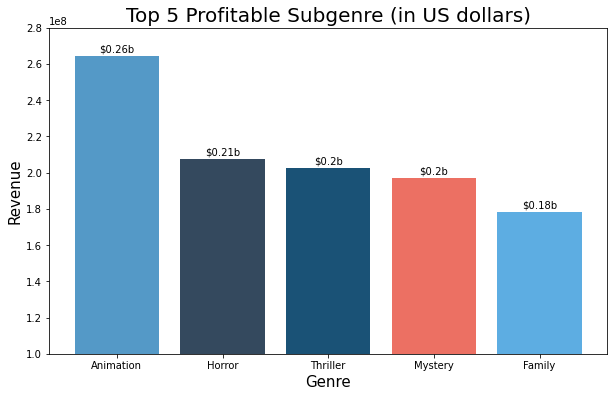

In [221]:
# plot
fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.set_title("Top 5 Profitable Subgenre (in US dollars)", size = 20)
ax.set_xlabel('Genre', size = 15)
ax.set_ylabel('Revenue', size = 15)
ax.set_ylim([100000000, 280000000])
dd = avg_rev['Genre'].apply(lambda x: colors_list[x])
ax.bar(avg_rev['Genre'][:5], height = avg_rev['avg_rev'][:5], color=dd)
add_toprev_labels(ax)
plt.show()

In [222]:
def add_bottomrev_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # If value of bar is greater than 400: Adjust label location
        if y_value > 400:
            space = spacing - 3
            # Vertically align label at top
            va = 'bottom'

        # Use Y value as label and format number with one decimal place, if Y is positive (nonzero)
        label = "${:.2}m".format(y_value/1000000) #if y_value >0 else None

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

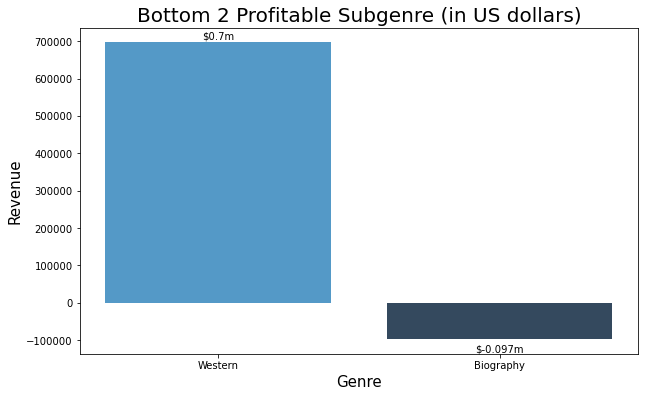

In [223]:
# plot
fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.set_title("Bottom 2 Profitable Subgenre (in US dollars)", size = 20)
ax.set_xlabel('Genre', size = 15)
ax.set_ylabel('Revenue', size = 15)
ax.bar(avg_rev['Genre'][-2:], height = avg_rev['avg_rev'][-2:], color = dd)
add_bottomrev_labels(ax)
plt.show()

>We see a large difference in revenue gained across horror film subgenres, with **Animation being the most profitable subgenre and Biography being the least**.

>Interestingly, the average revenue of Biography horror films is negative, suggesting investors to avoid putting money in any horror films related to personal biography.